# Correlación

El objetivo de este notebook es que se familiaricen con los conceptos de Covarianza y Correlación. Si bien las fórmulas parecen difíciles, esperemos que vean que nada es tan grave como parece. También que presten atención a cómo a veces es útil simular datos para aprender o acercarse a algunas técnicas.

Tenemos dos variables aleatorias $X$ e $Y$, de las cuales tenemos $n$ muestras de cada una, $x_1,x_2,..., x_n$ e $y_1,y_2,..., y_n$. Sus valores medios son $\bar{x}$ e $\bar{y}$, respectivamente. Definimos la Covarianza como

$$Cov(X,Y) = \sum_{i=1}^{n} \frac{(x_i - \bar{x})(y_i - \bar{y})}{n}$$

A veces verán que, en lugar de dividir por $n$, se divide por $n - 1$ ó $n - 2$, pero eso no es importante ahora. Según Wikipedia, __"la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión"__. 

Si bien la fórmula puede parece difícil, veamos qué nos dice de nuestros datos simulando algunos casos sencillos.

Empezamos generandos muestras al azar de dos variables aleatorias no relacionadas entre sí. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)

Documentación [Numpy Random Normal](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.normal.html).

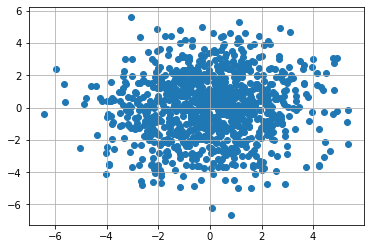

In [2]:
n = 1000
sigma_1 = 2
sigma_2 = 2
x = np.random.normal(size = n, scale = sigma_1) #Scale = SD (spread or “width”) of the distribution.
y = np.random.normal(size = n, scale = sigma_2)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

¿Hay alguna relación entre ellos? Acá, por relación, nos referimos a __"variación conjunta"__. Y por "variación conjunta" podemos imaginarnos que __si una de las variables aumenta, la otra también lo hace. Y si una variable disminuye su valor, la otra también lo hace__. La covarianza intenta cuantificar esa relación.

$$Cov(X,Y) = \sum_{i=1}^{n} \frac{(x_i - \bar{x})(y_i - \bar{y})}{n}$$

## Primero lo calculamos a mano:

In [3]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

0.2528305091626513


Pero la covarianza, tiene un pequeño problema, depende de la escala de nuestros datos (`sigma_1` y `sigma_2`). Entonces, para deshacernos de la escala, se puede definir al correlación, que no es otra cosa que la covarianza dividida la desviación estándar de cada variable aletaria.

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [4]:
corr = cov/(x.std()*y.std())
print(corr)

0.06774258096202031


Y con eso nos deshacemos de la escala. Un valor cercano a cero nos indica que no existe una relación (¿lineal?) entre las variables.

In [5]:
from IPython.display import Image
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png")

**Probar** con distintas escalas (modificando `sigma_1` y `sigma_2` y verán que `cov` tomará valores en un rango muy amplio, mientras que `corr` se mantendrá cercana a cero.

---

## Relación lineal

Veamos otro ejemplo: sabemos que existe una relación lineal entre $X$ e $Y$.

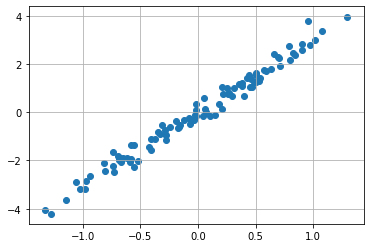

In [6]:
n = 100
x = np.linspace(-1,1,n) + 0.25*np.random.normal(size = n)
y = 3*x + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

La covarianza nos da

In [7]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

1.0934972126057352


In [8]:
corr = cov/(x.std()*y.std())
corr

0.9900841779265221

Ahora, en cambio, el valor es cercano a uno, indicando una relación lineal creciente entre ambas variables.

**Probar** cambiando la pendiente de la función lineal (el número que multiplica a `x` en `y = ...`) y mirar qué pasa. ¿Qué pasa si la pendiente es negativa?

### __Conclusiones__

1. La covarianza es una medida de la variación conjunta de dos variables. Pero tiene un problema: `depende de la escala`.
2. Para "deshacernos" de la escala, definimos la `correlación`, que es simplemente la covarianza dividida por el producto de la desviación estándar de cada variable. **Para pensar:** ¿por qué la desviación estándar está asociada a la escala de una variable?
3. La correlación es un valor entre `-1 y 1`. __La correlación toma un valor cercano a uno cuando hay una relación lineal creciente entre las variables, cero cuando no hay relación y -1 cuando hay una relación lineal decreciente__.
4. Esta correlación tiene un nombre particular: [Correlación de Pearson](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson).

---

## Covarianza y Correlación con Numpy

Numpy ya tiene incorporadas funciones que calculan la covarianza y la correlación entre dos variables. La única diferencia es que, en lugar de devolver un único valor, devuelve cuatro valores, que corresponden a la covarianza/correlación entre $X$ con $X$, $X$ con $Y$, $Y$ con $X$, e $Y$ con $Y$, conocida como __Matriz de Covarianza__.

In [9]:
np.cov([x,y])

array([[0.36623142, 1.10454264],
       [1.10454264, 3.39832672]])

In [10]:
Image(url= "https://i.stack.imgur.com/8xabz.png")

Y en el caso del coeficiente de correlación, la función de numpy nos devuelve la matriz de correlación.

In [11]:
np.corrcoef([x,y])

array([[1.        , 0.99008418],
       [0.99008418, 1.        ]])

Los $1$'s vienen dados porque $Cov(X,X)=Var(X)$ y $Cov(Y,Y)=Var(Y)$

---

## Relación No-Lineal entre variables

¿Qué ocurre cuando la relación no es lineal entre las variables? Veámoslo con un ejemplo.


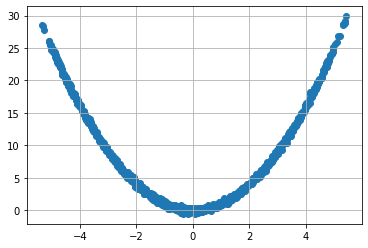

In [4]:
n = 1000
x = np.linspace(-5,5,n) + 0.25*np.random.normal(size = n)
y = x**2 + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

La covarianza nos da

In [13]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

0.16160984408199147


In [14]:
corr = cov/(x.std()*y.std())
corr

0.007320870882500841

Notar que la correlación de un valor alrededor de cero, indicando que no hay una correlación entre ambas variables. Pero esto NO indica que no hay un *relación* entre esas variables, solamente nos dice que no es lineal. Por eso es muy importante graficar.

In [15]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png")



**Probar** cambiando la relación matemática entre `x` e `y` y mirar qué pasa.

Para tratar con relaciones no lineal entre variables, existen otros tipos de correlaciones. La que vimos se llama **Correlación de Pearson**, que es la más famosa. Pero también existen otras, __Spearman__ y __Kendall__, que son muy útiles cuando existe una relación no lineal entre variables.